# **Import Libraries**

In [ ]:
import os
import keras
import tensorflow as tf 
from tensorflow import keras
from google.colab import drive
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense,BatchNormalization,SpatialDropout2D

# **Load Data**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/Shareddrives/Jinishpati Pro Max/soft_com/input/chest_xray')
!pwd

/content/drive/Shareddrives/Jinishpati Pro Max/soft_com/input/chest_xray


# Preprocessing Data

In [ ]:
#Preprocessing the Training set
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/drive/Shareddrives/Jinishpati Pro Max/soft_com/input/chest_xray/train',
        target_size=(128,128),
        batch_size=16 ,
        class_mode='binary')


#Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
        '/content/drive/Shareddrives/Jinishpati Pro Max/soft_com/input/chest_xray/test',
        target_size=(128,128),
        batch_size=16,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# **CNN**

In [ ]:
#Initialising the CNN
cnn = tf.keras.models.Sequential()

#Layers

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128, 3])) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(SpatialDropout2D(0.1))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.3))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.3))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.3))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Step 1 - Convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Step 2 - Pooling
cnn.add(BatchNormalization())
cnn.add(SpatialDropout2D(0.5))

cnn.add(tf.keras.layers.Flatten()) #Step 3 - Flattening
cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) #Step 4 - Full Connection
cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) #Step 4 - Full Connection
cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #Step 5 - Output Layer


#Compiling the CNN
adam=keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 spatial_dropout2d (SpatialD  (None, 64, 64, 32)       0         
 ropout2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

In [ ]:
cnn1 = cnn.fit_generator(
        training_set, steps_per_epoch=326, epochs=50, validation_data=test_set, validation_steps=39)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
326/326 [==============================] - 704s 2s/step - loss: 0.6781 - accuracy: 0.6929 - val_loss: 0.6565 - val_accuracy: 0.6250
Epoch 2/50
326/326 [==============================] - 101s 310ms/step - loss: 0.5920 - accuracy: 0.7291 - val_loss: 0.6295 - val_accuracy: 0.6250
Epoch 3/50
326/326 [==============================] - 104s 319ms/step - loss: 0.5688 - accuracy: 0.7345 - val_loss: 0.6020 - val_accuracy: 0.6250
Epoch 4/50
326/326 [==============================] - 100s 308ms/step - loss: 0.5320 - accuracy: 0.7419 - val_loss: 0.5242 - val_accuracy: 0.6250
Epoch 5/50
326/326 [==============================] - 101s 310ms/step - loss: 0.4794 - accuracy: 0.7623 - val_loss: 0.5354 - val_accuracy: 0.6298
Epoch 6/50
326/326 [==============================] - 100s 306ms/step - loss: 0.4394 - accuracy: 0.7910 - val_loss: 0.4678 - val_accuracy: 0.7788
Epoch 7/50
326/326 [==============================] - 100s 308ms/step - loss: 0.3843 - accuracy: 0.8322 - val_loss: 0.6147 - va

Text(0.5, 1.0, 'Accuracy Evolution')

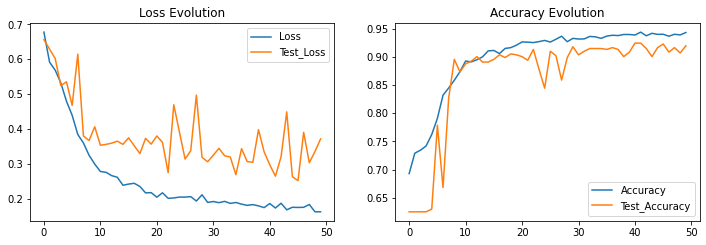

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(cnn1.history['loss'], label='Loss')
plt.plot(cnn1.history['val_loss'], label='Test_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(cnn1.history['accuracy'], label='Accuracy')
plt.plot(cnn1.history['val_accuracy'], label='Test_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = cnn.evaluate(test_set)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = cnn.evaluate(training_set)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

39/39 [==============================] - 8s 197ms/step - loss: 0.3716 - accuracy: 0.9199
Test Accuracy: 91.99%
326/326 [==============================] - 95s 290ms/step - loss: 0.1176 - accuracy: 0.9641
Train Accuracy: 96.41%
